In [63]:
#Import Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import os

In [64]:
# Specify the path where your CSV files are located
csv_files = glob.glob('Data/Cars/*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    file = file[10:-4]
    df['Brand'] = file 
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)


In [84]:
#Create a copy of df to use
df = combined_df.copy()
df = df.drop('tax(£)', axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102462 entries, 0 to 104640
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         102462 non-null  object 
 1   year          102462 non-null  int64  
 2   price         102462 non-null  int64  
 3   transmission  102462 non-null  object 
 4   mileage       102462 non-null  int64  
 5   fuelType      102462 non-null  object 
 6   tax           92938 non-null   float64
 7   mpg           97704 non-null   float64
 8   engineSize    102462 non-null  float64
 9   Brand         102462 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.6+ MB


In [85]:
#Checking for duplicatesd row - very low probabilities to have the same combinations of features, most likely a typo
df.duplicated().sum()

2179

In [86]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [88]:
#Check for duplicates
df.duplicated().sum()

0

In [87]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [89]:
num_rows, num_columns = df.shape
print("This dataset has ", num_rows, " rows and ", num_columns, " columns")

This dataset has  102462  rows and  10  columns


In [90]:
#Check nulls
df.isna().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9524
mpg             4758
engineSize         0
Brand              0
dtype: int64

In [91]:
#Handling missing values
df['tax']=df['tax'].fillna(df['tax'].mean())
df['mpg']=df['mpg'].fillna(df['mpg'].mean())

In [92]:
#Check nulls
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Brand           0
dtype: int64

In [94]:
#Initial diagnosis
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
year,102462.0,2017.06,2.13,1970.0,2016.00,2017.00,2019.0,2060.0
price,102462.0,16610.12,9717.26,450.0,9999.00,14298.00,20300.0,159999.0
mileage,102462.0,23250.27,21065.37,1.0,7800.00,17642.50,32457.0,323000.0
tax,102462.0,120.09,60.59,0.0,120.09,145.00,145.0,580.0
mpg,102462.0,55.21,15.80,0.3,47.10,55.21,62.8,470.8
engineSize,102462.0,1.65,0.56,0.0,1.20,1.50,2.0,6.6


In [12]:
cat_features = [column for column in df.columns if (df[column].dtypes == 'object') ]
print("Categorical Features: ")
cat_features

Categorical Features: 


['model', 'transmission', 'fuelType', 'Brand']

In [13]:
numeric_features = [column for column in df.columns if (df[column].dtypes != 'object') ]
print("Numeric Features: ")
numeric_features

Numeric Features: 


['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

In [14]:
#What brands do we have?
df['Brand'].unique()

array(['audi', 'bmw', 'focus', 'ford', 'hyundi', 'merc', 'skoda',
       'toyota', 'vauxhall', 'vw'], dtype=object)

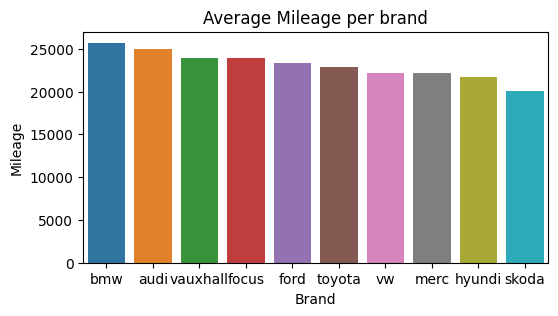

In [125]:
# Average mileage for a car for each brand
df_by_mileagedf=df.groupby(['Brand'])['mileage'].mean().sort_values(ascending=False).round().reset_index(name='Mileage')

plt.figure(figsize=(6,3))
plt.title("Average Mileage per brand")
sns.barplot(x='Brand', y ='Mileage', data=df_by_mileagedf, errorbar='sd')
plt.show()

- BMW, AUDI and VAUXHALL has the highest used car has the highest Mileage

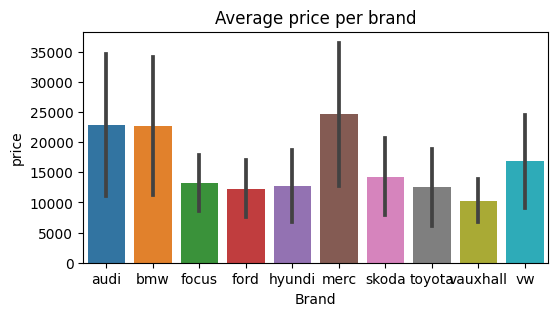

In [124]:
# Average price for a car for each brand
df_by_price = df.groupby(['Brand'])['price'].mean().sort_values(ascending=False).round().reset_index(name='price').sort_values(by='price', ascending=True)
df_by_price
plt.figure(figsize=(6,3))
plt.title("Average price per brand")
sns.barplot(x='Brand',y='price', data=df, errorbar="sd")
plt.show()

-   MERC, AUDI AND BMW SHOWS THE HIGHEST STDv... lets take a look if thats true

In [161]:
for brand in df['Brand'].unique():
    brand_std = df.loc[
        df['Brand'] == brand
    ]['price'].std()
    brand_mean = df.loc[
        df['Brand'] == brand
    ]['price'].mean()

    print('The stdv for: ', brand , " is:  ", brand_std.round(), " with a mean of: ", brand_mean.round(), " and a Coeficient of variation of: ", (brand_std/brand_mean).round(3))

The stdv for:  audi  is:   11723.0  with a mean of:  22854.0  and a Coeficient of variation of:  0.513
The stdv for:  bmw  is:   11435.0  with a mean of:  22693.0  and a Coeficient of variation of:  0.504
The stdv for:  focus  is:   4659.0  with a mean of:  13253.0  and a Coeficient of variation of:  0.352
The stdv for:  ford  is:   4736.0  with a mean of:  12270.0  and a Coeficient of variation of:  0.386
The stdv for:  hyundi  is:   5973.0  with a mean of:  12724.0  and a Coeficient of variation of:  0.469
The stdv for:  merc  is:   11874.0  with a mean of:  24636.0  and a Coeficient of variation of:  0.482
The stdv for:  skoda  is:   6340.0  with a mean of:  14285.0  and a Coeficient of variation of:  0.444
The stdv for:  toyota  is:   6359.0  with a mean of:  12530.0  and a Coeficient of variation of:  0.507
The stdv for:  vauxhall  is:   3530.0  with a mean of:  10314.0  and a Coeficient of variation of:  0.342
The stdv for:  vw  is:   7736.0  with a mean of:  16808.0  and a Coefi

-   Indeed! Merc, Audi and bmw have the highest stdv among the brands! we can expect a wider spread in the distribuition plot for these brands!
    lets take a look!

<Figure size 600x300 with 0 Axes>

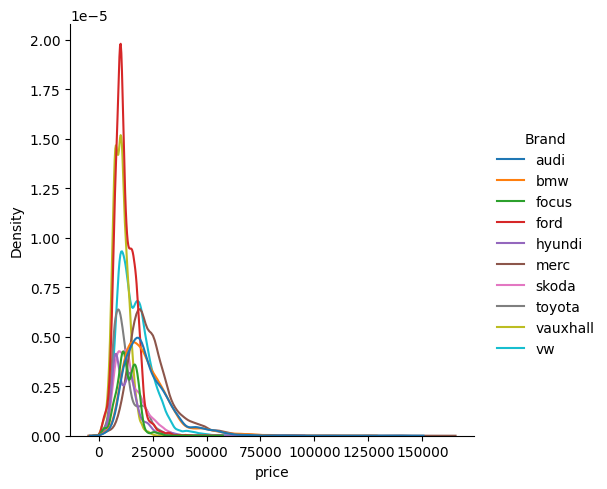

In [168]:
plt.figure(figsize=(6,3))
sns.displot(data=df, x='price', hue='Brand', kind ='kde')
plt.show()

- is not that wide... lets take a look at the mean